<a href="https://colab.research.google.com/github/matsunagalab/lecture_ML/blob/main/machine_learning_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8回 教師なし学習その2: 生成モデル入門

## 3つの正規分布の K-means クラスタリングとGaussian mixture model

等方的でない正規分布からなる3クラスデータに対して、K-meansクラスタリングとGMMを適用した結果を比較してみましょう

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


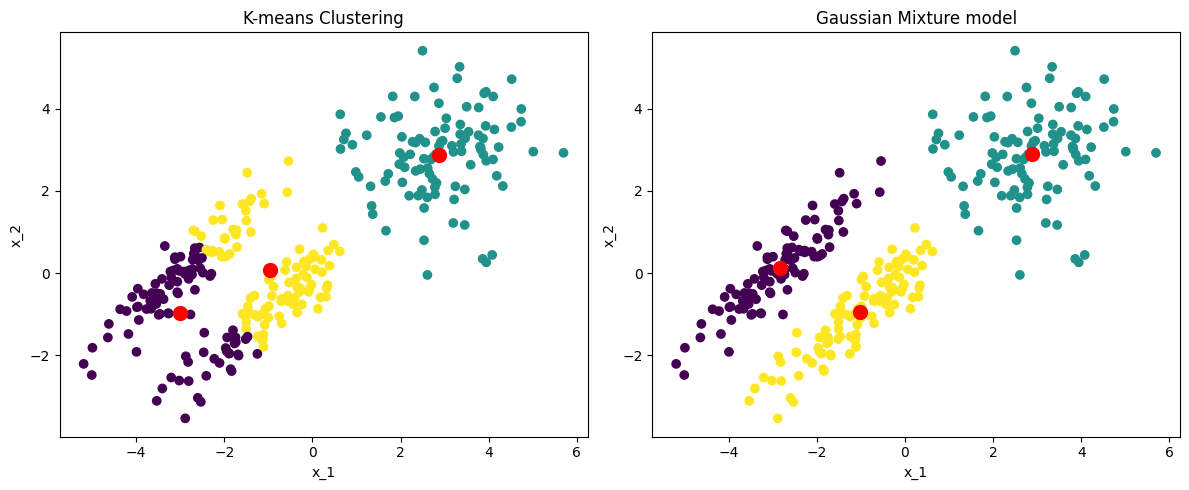

In [1]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# Generate data for cluster 1
mean1 = np.array([-1, -1])
cov1 = np.array([[1, 0.9], [0.9, 1]])
data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate data for cluster 2
mean2 = np.array([-3, 0])
cov2 = np.array([[1.0, 0.9], [0.9, 1.0]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Generate data for cluster 3
mean3 = np.array([3, 3])
cov3 = np.array([[1, 0], [0, 1]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

data = np.concatenate((data1, data2, data3))

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(data)
kmeans_labels = kmeans.labels_

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=777)
gmm.fit(data)
gmm_labels = gmm.predict(data)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot K-means results
ax1.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='red')
ax1.set_title('K-means Clustering')
ax1.set_xlabel('x_1')
ax1.set_ylabel('x_2')

# Plot Gaussian Mixture results
ax2.scatter(data[:, 0], data[:, 1], c=gmm_labels, cmap='viridis')
ax2.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=100, color='red')
ax2.set_title('Gaussian Mixture model')
ax2.set_xlabel('x_1')
ax2.set_ylabel('x_2')

plt.tight_layout()
plt.show()



Gaussian mixture modelは生成モデルなので、データを生成してみましょう

Text(0, 0.5, 'Y')

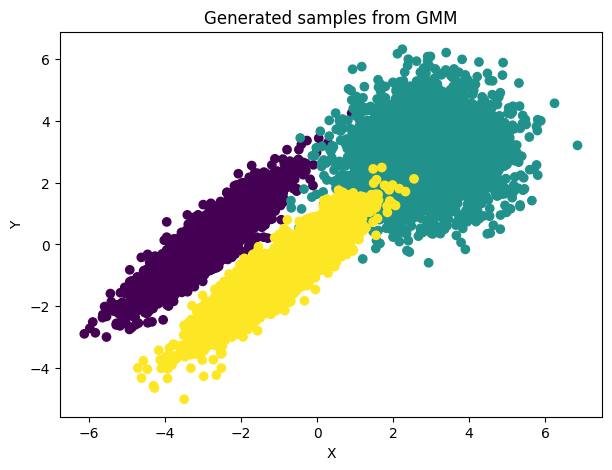

In [2]:
# Generate new samples from the Gaussian mixture model
new_samples = gmm.sample(10000)
new_data = new_samples[0]
new_label = new_samples[1]

# Plot the generated samples
plt.figure(figsize=(7, 5))
plt.scatter(new_data[:, 0], new_data[:, 1], c=new_label)
plt.title('Generated samples from GMM')
plt.xlabel('X')
plt.ylabel('Y')

## MNIST dataset の Gaussian mixture model

MNISTデータに対してGMMを適用し、各Gaussianの平均ベクトルを画像化してみてみましょう

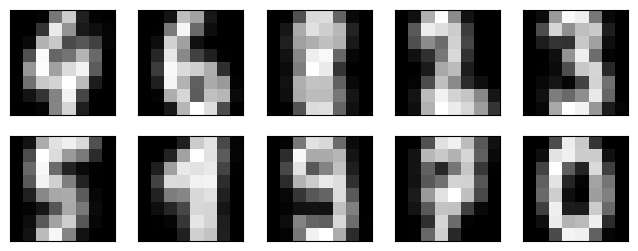

In [3]:
# Import required libraries
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = datasets.load_digits()
data = digits.data

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=10, random_state=321)
gmm.fit(data)

# Samples at mean positions
means = gmm.means_
mean_samples = means.reshape(-1, 8, 8)

# Plot the mean samples
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, mean_sample in zip(ax.flat, mean_samples):
    axi.set(xticks=[], yticks=[])
    axi.imshow(mean_sample, interpolation='nearest', cmap='gray')

plt.show()

Gaussian mixture modelは生成モデルなので、ひとつのGaussianに絞ってデータを生成してみましょう

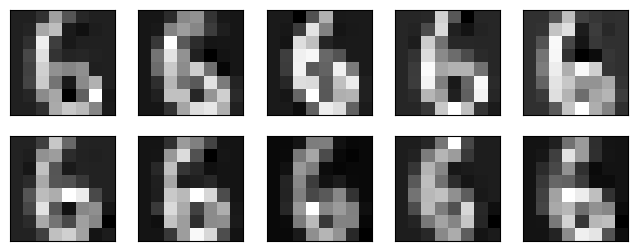

In [4]:
# Get the mean and covariance of a particular component
component = 1
mean = gmm.means_[component]
covariance = gmm.covariances_[component]

# Number of samples
n_samples = 10

# Generate samples from the particular gaussian
samples = [np.random.multivariate_normal(mean, covariance) for _ in range(n_samples)]
sample_images = [sample.reshape(8, 8) for sample in samples]

# Plot the generated samples
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, sample_image in zip(ax.flat, sample_images):
    axi.set(xticks=[], yticks=[])
    axi.imshow(sample_image, interpolation='nearest', cmap='gray')

plt.show()